# Predicting employee retention

## Contents:
1. Understanding the HR data columns
2. Perform basic data check
3. Perform relation analysis by graphical approach
4. Cleaning the data/Data Transformation
5. Data preperation for Model selection for Training & Test
6. Conclusion

## 2. Perform basic data check

#### Impoting all relevant Libraries that support to do Exploratory Data Analysis

In [443]:
import pandas as pd
import os
import numpy as np
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import sklearn.preprocessing as preproc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm

sns.set_style('whitegrid')

DATA_PATH = 'HrData/'
def load_Hr_data(data_path,fileName): 
    csv_path = os.path.join(data_path, fileName) 
    try:
        return pd.read_csv(csv_path)
    except:
        print("Given File not available..Please check you entered the correct fine name...!")

#### Loding Data from CSV to DataFrame

In [444]:
HRData = load_Hr_data(DATA_PATH,'datasets_11142_15488_HR_comma_sep.csv')

#### Let’s have the view on of the data into a tabular form

In [445]:
HRData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Checking if there is any missing data which require Imputation. 

In [446]:
HRData.isna().sum() # No Data missing hence no missing imputation required

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

#### Check for the Data Types of all feature(Checking of Numerical and Categorical feature presence)

In [450]:
HRData.info() # Two Categorical feature present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Checking counts of rows and cloumns present in sample data(size)

In [451]:
HRData.shape #So total 14999 no. of instances present and total 10 column including the TARGET feature 'left'

(14999, 10)

In [452]:
HRData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [453]:
HRData.columns # Printing all columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

#### Check for Target value(left) : Different target values with it's counts of occurance

In [454]:
HRData.left.value_counts() ## Employee retention is ture if "left" is 0 

0    11428
1     3571
Name: left, dtype: int64

##### Employee retention is ture if "left" is 0 

#### Check if there is any pattern for employee who left

In [455]:
HRData[(HRData.left==1) ]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Categorical feature analysis
Two categorical features are - Department and Salary

#### 1. Realtionship with Department feature

In [456]:
HRData.Department.value_counts() # Department wise Employee counts

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [457]:
HRData[HRData.left==1].Department.value_counts() # Department wise Employee counts who left the organization

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: Department, dtype: int64

#### Percentage of Department wise employee attrition
The precentage of employee leaving is not significantly dependent on any department 

In [458]:
(HRData[HRData.left==1].Department.value_counts() / HRData.Department.value_counts()) * 100 

IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: Department, dtype: float64

#### 2. Relationship with Salary feature

In [459]:
HRData.salary.value_counts() #Distribution Salary category across organization

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [460]:
HRData[HRData.left==1].salary.value_counts() #Count of employee left in each Salary category across organization

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [461]:
(HRData[HRData.left==1].salary.value_counts() / HRData.salary.value_counts()) * 100 

low       29.688354
medium    20.431275
high       6.628941
Name: salary, dtype: float64

#### Percentage of Salary category wise employee attrition
The precentage of employee leaving is significantly dependent on salary category
Majority of employee left was drawing low or medium salary

In [462]:
HRData[(HRData.left==1 ) & (HRData.salary=='high')].promotion_last_5years.value_counts()

0    82
Name: promotion_last_5years, dtype: int64

#### Out of all employee left having high salary did not get promotion in last 5 years

In [463]:
HRData[(HRData.left==1 ) & (HRData.salary=='high')].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.0,82.0,82.0
mean,0.434512,0.644024,3.451220,193.097561,3.682927,0.0,1.0,0.0
std,0.225055,0.185145,1.778836,61.586356,0.844416,0.0,0.0,0.0
min,0.090000,0.460000,2.000000,128.000000,3.000000,0.0,1.0,0.0
25%,0.370000,0.492500,2.000000,146.500000,3.000000,0.0,1.0,0.0
50%,0.430000,0.550000,2.000000,157.000000,3.000000,0.0,1.0,0.0
75%,0.450000,0.857500,5.000000,255.750000,4.000000,0.0,1.0,0.0
max,0.900000,0.990000,7.000000,307.000000,5.000000,0.0,1.0,0.0


Converting Salary feature to numerical field

In [464]:
le = LabelEncoder()
HRData["Salary_Encoded"] = le.fit_transform(HRData.salary)

In [465]:
HRData[HRData.left==1].Salary_Encoded.value_counts()

1    2172
2    1317
0      82
Name: Salary_Encoded, dtype: int64

Dropping Department categorical feature as it has no significant relation on attrition

In [466]:
feature_to_drop = ['Department', 'salary']

In [467]:
HRData.drop(feature_to_drop, axis=1, inplace=True)

In [468]:
HRData.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary_Encoded
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


## 3. Relation analysis by graphical approach


### Correlation Matrix plots : 

#### Visualizing the data by graphs and figures. 
A pairplot provides the relationship among all the numerical columns in the dataframe

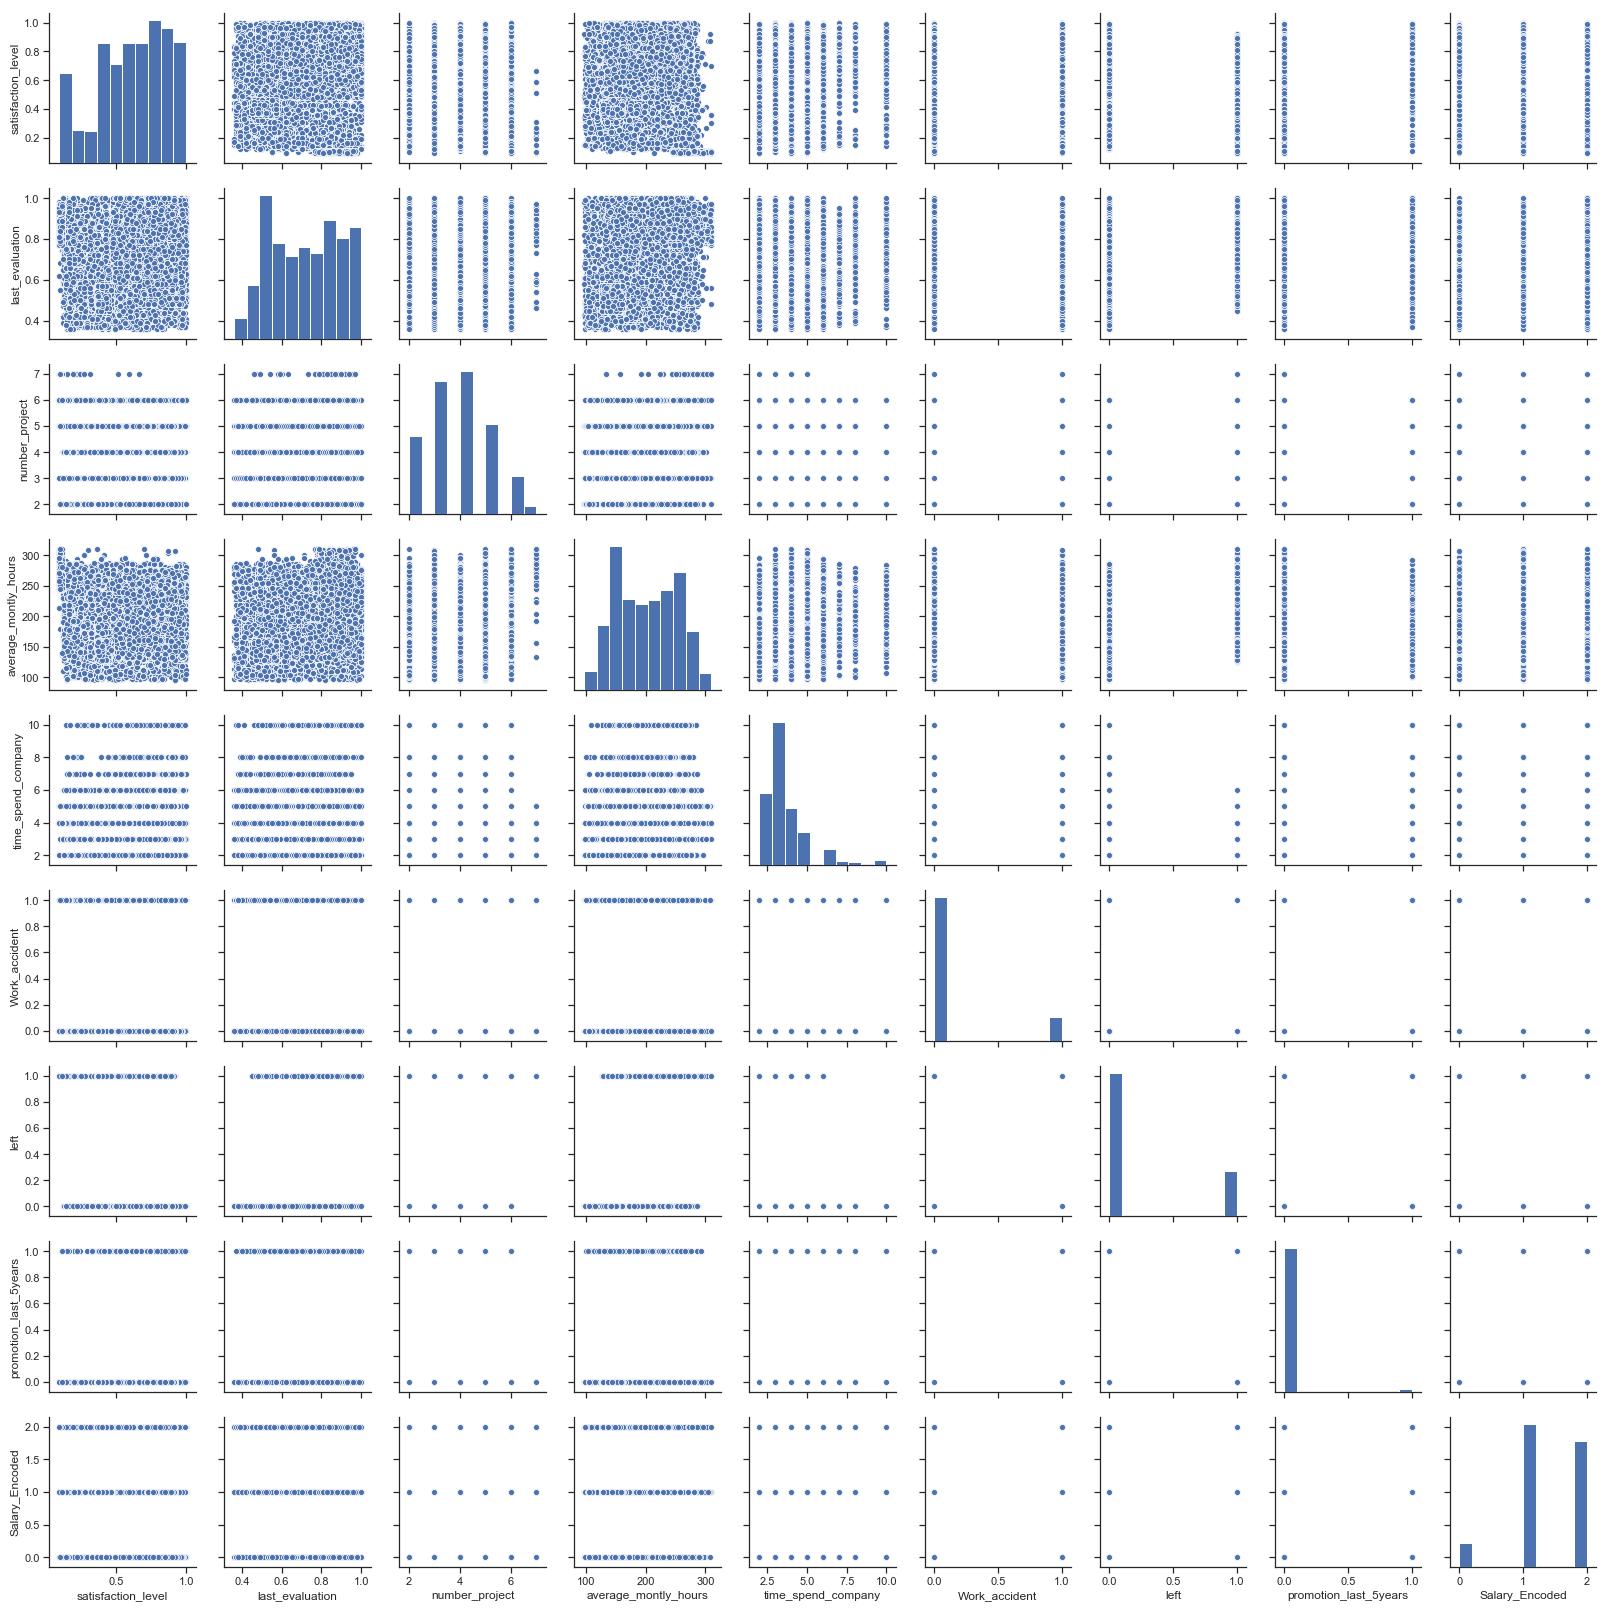

In [469]:
sns.set(style="ticks")
sns.pairplot(data=HRData)

#### Ovservation : 
Most of the data is having outliers

#### Check the strength of the correlation among the variables
A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap

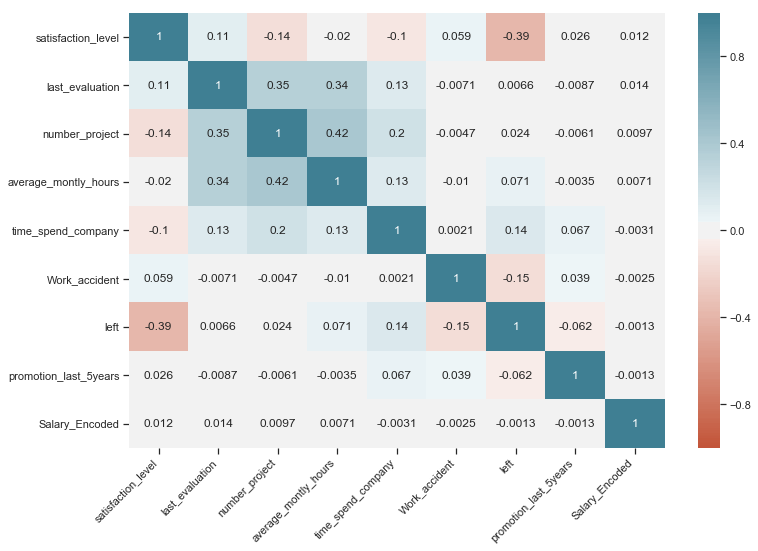

In [471]:
plt.figure(figsize=(12,8))
corr = HRData.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot=True,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#### Plotting the relationship among the features

In [472]:
corr_matrix = HRData.corr()
corr_matrix["left"].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
Salary_Encoded          -0.001294
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

#### Findings:
satisfaction_level, salary, Work_accident, time_spend_company, most influence the company leaving decission

#### Strong relations :
-------------
1. satisfaction_level [Negative/ inverse relation (-0.388)]
2. salary [Negative / inverse relation (-0.157)]
3. Work_accident [Negative / inverse relation (- 0.154)]
3. time_spend_company [Positive relation (0.144)]


#### Moderate relations :
-------------
1. average_montly_hours  [Positive relation (0.071)]
2. promotion_last_5years [Negative / inverse relation (-0.061)]

#### Plotting the relationship among the important features influecing the leaving the organisation

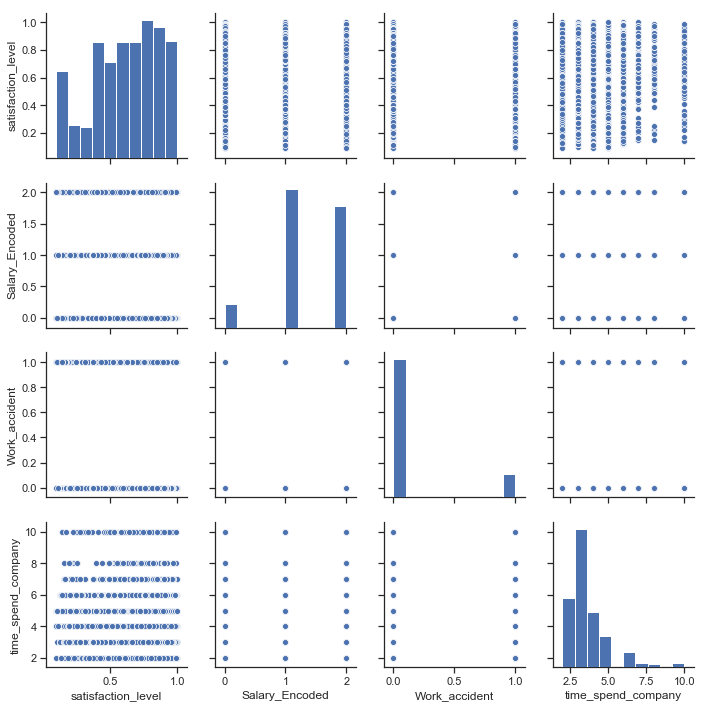

In [473]:
sns.pairplot(HRData[['satisfaction_level','Salary_Encoded','Work_accident','time_spend_company']])


Text(0, 0.5, 'Left')

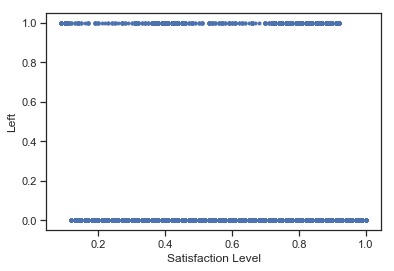

In [474]:
plt.plot(HRData.satisfaction_level,HRData.left, '.')
plt.xlabel("Satisfaction Level")
plt.ylabel("Left")

Text(0, 0.5, 'Left')

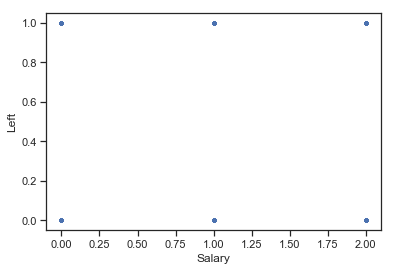

In [475]:
plt.plot(HRData.Salary_Encoded,HRData.left, '.')
plt.xlabel("Salary")
plt.ylabel("Left")

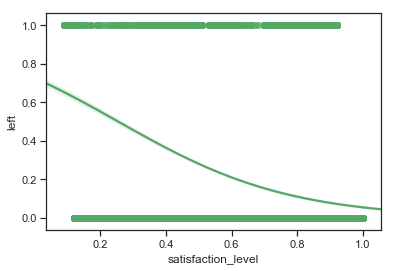

In [476]:
# Plot logistic regression line 
sns.regplot(x='satisfaction_level', y='left', data=HRData, logistic=True, color='g')

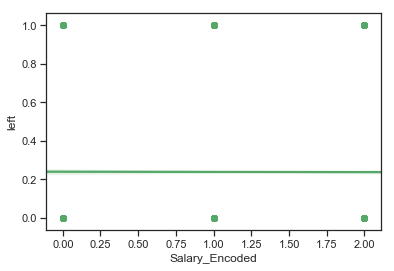

In [478]:
# Plot logistic regression line 
sns.regplot(x='Salary_Encoded', y='left', data=HRData, logistic=True, color='g')

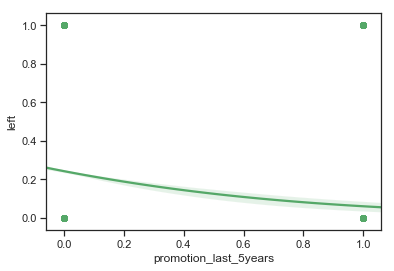

In [479]:
# Plot logistic regression line 
sns.regplot(x='promotion_last_5years', y='left', data=HRData, logistic=True, color='g')

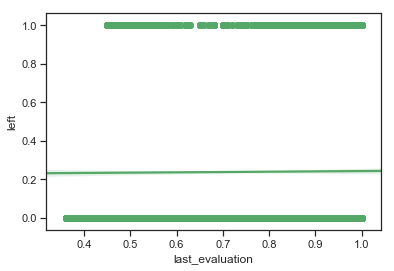

In [480]:
# Plot logistic regression line 
sns.regplot(x='last_evaluation', y='left', data=HRData, logistic=True, color='g')

Text(0.5, 1.0, 'Salary distribution')

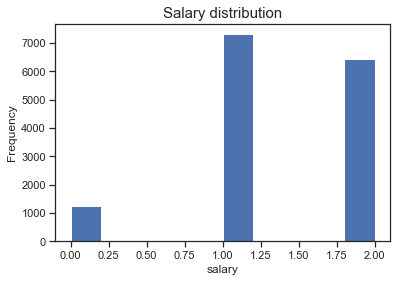

In [481]:
# Plot logistic regression line 
(HRData['Salary_Encoded']).plot.hist(edgecolor = 'white')
plt.xlabel('salary', fontsize=12)
plt.title('Salary distribution', fontsize=15)

#### Conclusion

1. As Satisfaction level decreases ==> Chances of leaving organisation increases
2. When Salary less ==> Chances of leaving organisation increases
3. If no promotion last 5years  ==> Chances of leaving organisation increases

#### Ploting Histogram to quickly assess the distribution of each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c627f6588>,
      dtype=object)

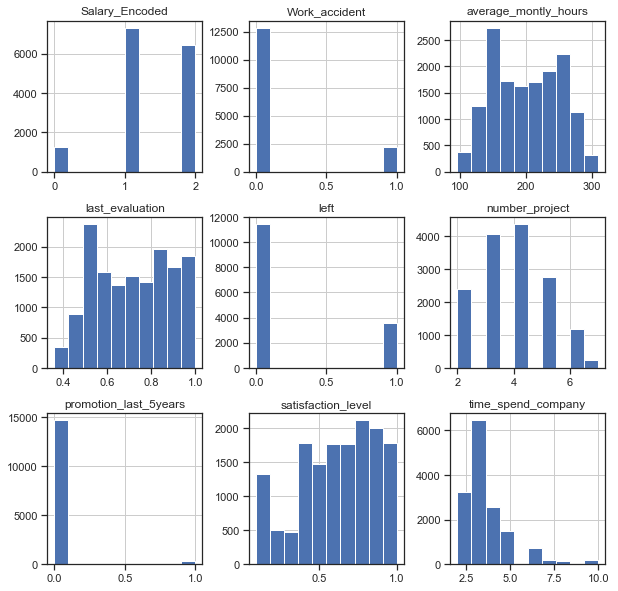

In [482]:
HRData.hist(figsize=(10,10))

#### Finding different vital statistics of different feature

In [483]:
HRData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary_Encoded
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


#### Conclusion
1. Scale/range of average_montly_hours is quite high compared to other features

### Finding Outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


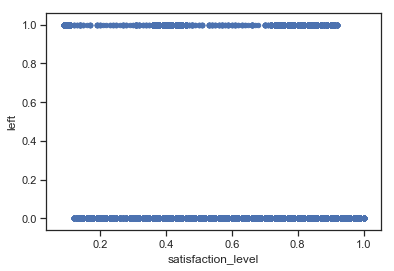

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


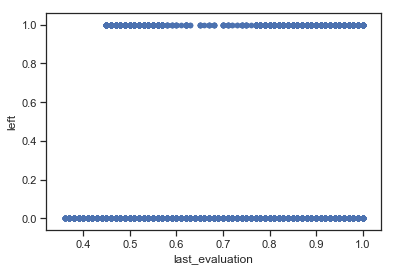

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


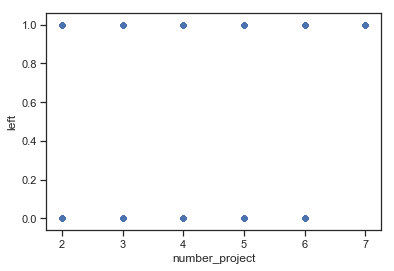

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


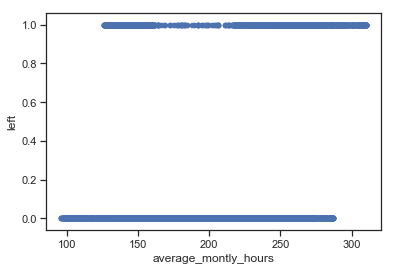

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


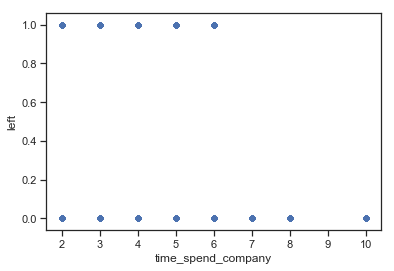

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


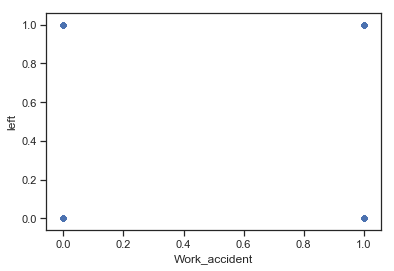

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


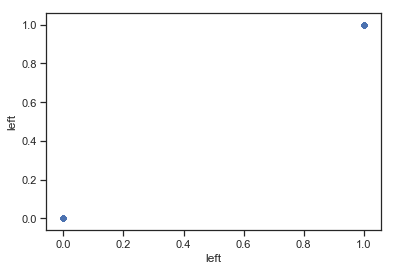

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


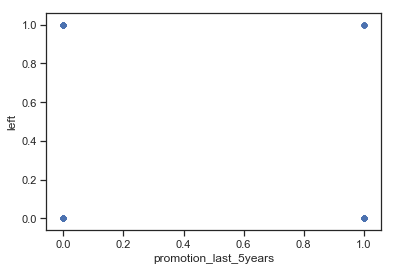

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


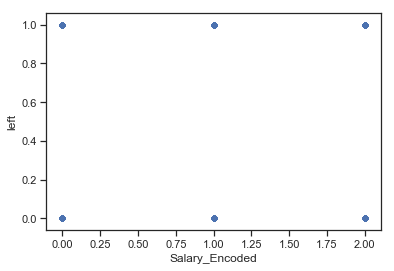

In [484]:
for columnname in HRData:
    HRData.plot(kind='scatter', x=columnname , y='left')
    plt.show()

#### Discover outliers with mathematical function

#### IQR score :
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data

In [485]:
Q1 = HRData.quantile(0.25)
Q3 = HRData.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfaction_level        0.38
last_evaluation           0.31
number_project            2.00
average_montly_hours     89.00
time_spend_company        1.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
Salary_Encoded            1.00
dtype: float64


In [486]:
HRData_out = HRData[~((HRData < (Q1 - 1.5 * IQR)) |(HRData > (Q3 + 1.5 * IQR))).any(axis=1)]
HRData_out.shape

(8404, 9)

#### Conclusion
1. If we remove outliers, then we will be loosing almost 8404 sample data. So we will not remove it

## 4. Data cleaning / Transformation

As total sulfur dioxide and free sulfur dioxide is quite high compared to other features, we will do a feature scaling of both the feature

In [487]:
HRData['average_montly_hours_minmax'] = preproc.minmax_scale(HRData[['average_montly_hours']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64.
  """Entry point for launching an IPython kernel.


In [488]:
HRData.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Salary_Encoded,average_montly_hours_minmax
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.347290,0.490889
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.625819,0.233379
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.280374
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.485981
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.696262
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


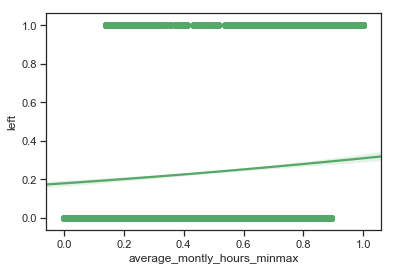

In [489]:
sns.regplot(x='average_montly_hours_minmax', y='left', data=HRData, logistic=True, color='g')

#### Dropping features which already transformed

In [490]:
dropFeature = ['average_montly_hours']
HRData.drop(dropFeature, axis=1,inplace=True)

In [491]:
HRData.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'Salary_Encoded', 'average_montly_hours_minmax'],
      dtype='object')

In [492]:
HRData.shape

(14999, 9)

In [495]:
IDV_feature = ['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'Salary_Encoded', 'average_montly_hours_minmax']

## 5. Data preperation for Model selection for Training & Test

#### Splitting train and test Data

In [496]:
# With sklearn train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(HRData[IDV_feature],HRData.left,train_size=0.7, random_state=42)
print(len(X_train) + len(y_train) , "train +", len(X_test) + len(y_test), "test")


20998 train + 9000 test


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [497]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'Salary_Encoded', 'average_montly_hours_minmax'],
      dtype='object')

In [498]:
X_train.shape

(10499, 8)

In [499]:
y_train.shape

(10499,)

In [500]:
y_train.value_counts()

0    8000
1    2499
Name: left, dtype: int64

In [501]:
y_train.head()

12602    1
4889     0
1572     1
13375    0
879      1
Name: left, dtype: int64

### Model Selection

#### Using Logistic Regression

In [502]:
from sklearn.linear_model import LogisticRegression

In [503]:
# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [504]:
# Make class label predictions
y_train_predict = log_reg.predict(X_train)

In [505]:
y_train_predict[:15]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [506]:
# comrape the prediction with actual
np.array(y_train)[:15]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

## Model Evaluation

In [507]:
from sklearn import metrics
# Print Confusion Matrix.from sklearn import metrics
# Print Confusion Matrix
print ("Acuracy score on training set" , metrics.accuracy_score(y_train, y_train_predict))

Acuracy score on training set 0.7688351271549672


#### Observe class prediction on test data

In [508]:
y_test_predict = log_reg.predict(X_test)
y_test_predict[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [509]:
# comrape the prediction with actual in test data set
np.array(y_test)[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [510]:
print ("Acuracy score on Testing set" , metrics.accuracy_score(y_test, y_test_predict))

Acuracy score on Testing set 0.7595555555555555


In [511]:
# Print Confusion Matrix
print (metrics.confusion_matrix(y_test, y_test_predict))

[[3162  266]
 [ 816  256]]


In [512]:
print (metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

   micro avg       0.76      0.76      0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



#### Model prediction ovservation:
There is no much difference between accuracy score between Train and Test data set
****
Model failed to predict correctly for Class 1  with low score on both Precision and Recall
****

#### Evaluating other classification models

In [534]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [539]:
# Train different classification model
log_KNN = KNeighborsClassifier()
log_DT = DecisionTreeClassifier()
log_SVC = SVC()
log_SGD = SGDClassifier(random_state=42, max_iter=10)
log_RandomForest = RandomForestClassifier(random_state=42)

log_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [540]:
log_DT.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [541]:
log_SVC.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [542]:
log_SGD.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [543]:
log_RandomForest.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [544]:
#Prediction using different model on test data
predict_KNN = log_KNN.predict(X_test)
predict_DT = log_DT.predict(X_test)
predict_SVC = log_SVC.predict(X_test)
predict_SGD = log_SGD.predict(X_test)
predict_RF = log_RandomForest.predict(X_test)

In [545]:
print ("Acuracy score on Testset: Using Logistic Regression" , metrics.accuracy_score(y_test, y_test_predict))
print ("Acuracy score on Testset: Using KNeighborsClassifier" , metrics.accuracy_score(y_test, predict_KNN))
print ("Acuracy score on Testset: Using DecisionTreeClassifier" , metrics.accuracy_score(y_test, predict_DT))
print ("Acuracy score on Testset: Using SVC" , metrics.accuracy_score(y_test, predict_SVC))
print ("Acuracy score on Testset: Using SGDClassifier" , metrics.accuracy_score(y_test, predict_SGD))
print ("Acuracy score on Testset: Using RandomForest" , metrics.accuracy_score(y_test, predict_RF))

Acuracy score on Testset: Using Logistic Regression 0.7595555555555555
Acuracy score on Testset: Using KNeighborsClassifier 0.9595555555555556
Acuracy score on Testset: Using DecisionTreeClassifier 0.9773333333333334
Acuracy score on Testset: Using SVC 0.952
Acuracy score on Testset: Using SGDClassifier 0.7471111111111111
Acuracy score on Testset: Using RandomForest 0.9862222222222222


In [554]:
model_type = {'Logistic Regression': y_test_predict, 'KNeighborsClassifier' : predict_KNN,'DecisionTreeClassifier' : predict_DT, 'SVC' : predict_SVC, 'SGDClassifier' :  predict_SGD,'RandomForest' : predict_RF}
for model_predict in model_type:
    print("Metric Score for : " , model_predict)
    print (metrics.classification_report(y_test, model_type[model_predict]))


Metric Score for :  Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3428
           1       0.49      0.24      0.32      1072

   micro avg       0.76      0.76      0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

Metric Score for :  KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3428
           1       0.92      0.90      0.91      1072

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.95      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

Metric Score for :  DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3428
           1       0.94      0.96      0.95      1072

   micro avg       0.98      0.98      0.98      4500
   m

## Conclusion:
With different parameter analysez above Logistic regression Model not performing well in prediction across both class and DecissionTree is highly overfitted 
Hence we will select SVC as final model to proceed further  